### Emoji prediction

In [8]:
##Import data set
import numpy as np
import pandas as pd
df1 = pd.read_csv('train_emoji.csv',header=None)
df2 = pd.read_csv('test_emoji.csv',header=None)

In [96]:
## Converting data to numpy 
data = df1.values
data_test = df2.values
X_Train = data[:,0]
Y_Train = data[:,1]
X_Test = data_test[:,0]
Y_Test = data_test[:,1]
print(X_Train.shape,Y_Train.shape,X_Test.shape)
#print(X_Train[0])
#print(Y_Train[0])
#print(X_Test[0])

(132,) (132,) (56,)


In [81]:
### Converting Y_Train into one hot vector
from keras.utils import np_utils
YTrain = np_utils.to_categorical(Y_Train)

In [82]:
#Importing emoji package and make a dictonary 
import emoji
#emoji.EMOJI_UNICODE
emoji_dictionary = {"0": "\u2764\uFE0F",    # :heart: prints a black instead of red heart depending on the font
                    "1": ":baseball:",
                    "2": ":beaming_face_with_smiling_eyes:",
                    "3": ":downcast_face_with_sweat:",
                    "4": ":fork_and_knife:",
                   }
## Numbers are the output of the model and names are mapping
## Example
def Print_emoji():
    for e in emoji_dictionary.values():
        print(emoji.emojize(e))
Print_emoji()

❤️
⚾
😁
😓
🍴


In [83]:
## Importing the pre-trained vector (Glove) Kaggle
embedding_dict = {}
with open('glove.6B.50d.txt',encoding='utf8') as f:
    for lines in f:
        #print(lines)
        lines_s = lines.split()
        #print(lines[1:])
        word = lines_s[0]
        values_arr = np.asarray(lines_s[1:],dtype='float32')
        embedding_dict[word] = values_arr
print(len(embedding_dict))

400000


In [84]:
### Converting the sentence in training into the vector
def contruct_glove_embedding(X):
    embedding_matrix_output = np.zeros((X.shape[0],10,50))
    for ix in range(X.shape[0]):
        X[ix] = X[ix].split()
        for iy in range(len(X[ix])):
            embedding_matrix_output[ix][iy] = embedding_dict[X[ix][iy].lower()]
    return embedding_matrix_output
X_Train_new = contruct_glove_embedding(X_Train)
X_Test_new = contruct_glove_embedding(X_Test)

In [85]:
## Importing layers from keras 
from keras.layers import *
from keras.models import Sequential

In [143]:
model = Sequential()
model.add(LSTM(64,input_shape=(10,50),return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(64,input_shape=(10,50),return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64,input_shape=(10,50)))
model.add(Dropout(0.3))
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_37 (LSTM)               (None, 10, 64)            29440     
_________________________________________________________________
dropout_36 (Dropout)         (None, 10, 64)            0         
_________________________________________________________________
lstm_38 (LSTM)               (None, 10, 64)            33024     
_________________________________________________________________
dropout_37 (Dropout)         (None, 10, 64)            0         
_________________________________________________________________
lstm_39 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dropout_38 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 5)               

In [144]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [145]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
checkpounts = ModelCheckpoint("Model_weights.h5",save_best_only=True,save_weights_only=True)
EarlyStopping(patience=10,monitor='val_acc')
hist = model.fit(X_Train_new,YTrain,batch_size=32,epochs=40,shuffle=True,validation_split=0.1)

Train on 118 samples, validate on 14 samples
Epoch 1/40
118/118 [==============================] - 3s 21ms/step - loss: 1.6080 - acc: 0.2034 - val_loss: 1.5971 - val_acc: 0.3571
Epoch 2/40
118/118 [==============================] - 0s 2ms/step - loss: 1.5425 - acc: 0.3814 - val_loss: 1.6267 - val_acc: 0.3571
Epoch 3/40
118/118 [==============================] - 0s 1ms/step - loss: 1.5239 - acc: 0.3475 - val_loss: 1.6578 - val_acc: 0.3571
Epoch 4/40
118/118 [==============================] - 0s 962us/step - loss: 1.4870 - acc: 0.3559 - val_loss: 1.6480 - val_acc: 0.3571
Epoch 5/40
118/118 [==============================] - 0s 1ms/step - loss: 1.4314 - acc: 0.4746 - val_loss: 1.6113 - val_acc: 0.1429
Epoch 6/40
118/118 [==============================] - 0s 995us/step - loss: 1.3888 - acc: 0.4407 - val_loss: 1.5169 - val_acc: 0.2143
Epoch 7/40
118/118 [==============================] - 0s 1ms/step - loss: 1.3060 - acc: 0.5000 - val_loss: 1.4260 - val_acc: 0.4286
Epoch 8/40
118/118 [======

In [135]:
val_loss = hist.history['val_loss']
val_acc = hist.history['val_acc']
loss =  hist.history['loss']
acc = hist.history['acc']

In [130]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


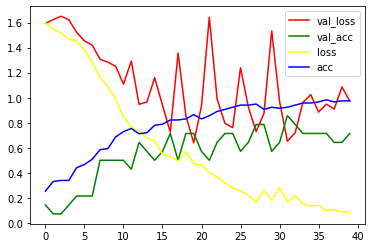

In [139]:
import matplotlib.pyplot as plt
plt.plot(val_loss,color='red',label='val_loss')
plt.plot(val_acc,color='green',label='val_acc')
plt.plot(loss,color='yellow',label='loss')
plt.plot(acc,color='blue',label='acc')
plt.legend()
plt.show()

### Prediction

In [147]:
Y_pred = model.predict_classes(X_Test_new)

In [151]:
def predict_emoji(num):
    print(emoji.emojize(emoji_dictionary[str(num)]))
for i in range(len(Y_pred[:5])):
    print(X_Test[i],end=" ")
    predict_emoji(Y_pred[i])

I want to eat	 🍴
he did not answer	 😓
he got a raise	 😓
she got me a present	 😓
ha ha ha it was so funny	 😁
